# **<span style="font-size:larger;"> 02: <span style="color:blue">EDA & Pre-Processing</span>** #

In [65]:
# Import Libraries

import pandas as pd
import numpy as np

from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import contractions
import string

import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Read Data

df = pd.read_csv('../data/original_df.csv')
bros = pd.read_csv('../data/animalsbeingbros.csv')
jerks = pd.read_csv('../data/animalsbeingjerks.csv')

# **2.1 EDA - Title Length**

In this section, we will analyze the distribution of title lengths between the two subreddits.

**Creating Necessary Columns**

In [26]:
bros['Character Length']=bros['title'].str.len()
bros['Word Count'] = df['title'].str.split().str.len()
jerks['Character Length']=jerks['title'].str.len()
jerks['Word Count'] = jerks['title'].str.split().str.len()

**Analyzing Mean, Max, and Min**

In [27]:
print('~~~~~~~~~~~~~~~~')
print(f"Average Title Word Count (r/AnimalsBeingBros): {bros['Word Count'].mean()}")
print(f"Average Title Word Count (r/AnimalsBeingJerks): {jerks['Word Count'].mean()}")
print(' ')
print(f"Average Title Character Count (r/AnimalsBeingBros): {bros['Character Length'].mean()}")
print(f"Average Title Character Count (r/AnimalsBeingJerks): {jerks['Character Length'].mean()}")
print('~~~~~~~~~~~~~~~~')
print(f"Average Title Word Count (r/AnimalsBeingBros): {bros['Word Count'].median()}")
print(f"Average Title Word Count (r/AnimalsBeingJerks): {jerks['Word Count'].median()}")
print(' ')
print(f"Average Title Character Count (r/AnimalsBeingBros): {bros['Character Length'].median()}")
print(f"Average Title Character Count (r/AnimalsBeingJerks): {jerks['Character Length'].median()}")
print('~~~~~~~~~~~~~~~~')
print(f"Max Title Word Count (r/AnimalsBeingBros): {bros['Word Count'].max()}")
print(f"Max Title Word Count (r/AnimalsBeingJerks): {jerks['Word Count'].max()}")
print(' ')
print(f"Max Title Character Count (r/AnimalsBeingBros): {bros['Character Length'].max()}")
print(f"Max Title Character Count (r/AnimalsBeingJerks): {jerks['Character Length'].max()}")
print('~~~~~~~~~~~~~~~~')
print(f"Min Title Word Count (r/AnimalsBeingBros): {bros['Word Count'].min()}")
print(f"Min Title Word Count (r/AnimalsBeingJerks): {jerks['Word Count'].min()}")
print(' ')
print(f"Min Title Character Count (r/AnimalsBeingBros): {bros['Character Length'].min()}")
print(f"Min Title Character Count (r/AnimalsBeingJerks): {jerks['Character Length'].min()}")


~~~~~~~~~~~~~~~~
Average Title Word Count (r/AnimalsBeingBros): 7.995484975867974
Average Title Word Count (r/AnimalsBeingJerks): 7.458912768647282
 
Average Title Character Count (r/AnimalsBeingBros): 42.868597228709326
Average Title Character Count (r/AnimalsBeingJerks): 39.59197218710493
~~~~~~~~~~~~~~~~
Average Title Word Count (r/AnimalsBeingBros): 6.0
Average Title Word Count (r/AnimalsBeingJerks): 6.0
 
Average Title Character Count (r/AnimalsBeingBros): 34.0
Average Title Character Count (r/AnimalsBeingJerks): 32.0
~~~~~~~~~~~~~~~~
Max Title Word Count (r/AnimalsBeingBros): 63
Max Title Word Count (r/AnimalsBeingJerks): 58
 
Max Title Character Count (r/AnimalsBeingBros): 300
Max Title Character Count (r/AnimalsBeingJerks): 300
~~~~~~~~~~~~~~~~
Min Title Word Count (r/AnimalsBeingBros): 1
Min Title Word Count (r/AnimalsBeingJerks): 1
 
Min Title Character Count (r/AnimalsBeingBros): 1
Min Title Character Count (r/AnimalsBeingJerks): 1


## Histograms

**By Character Count**

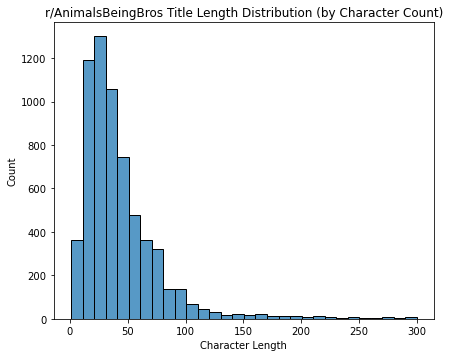

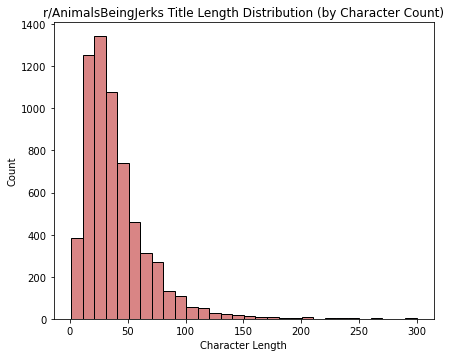

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(15,12), facecolor='white')

plt.subplot(2,2,1)
sns.histplot(data=bros,bins = 30, x="Character Length").set(title='r/AnimalsBeingBros Title Length Distribution (by Character Count)')
plt.show()

plt.figure(figsize=(15,12), facecolor='white')

plt.subplot(2,2,2)
sns.histplot(data=jerks, bins =30, x="Character Length", color='indianred').set(title='r/AnimalsBeingJerks Title Length Distribution (by Character Count)')
plt.show()

plt.tight_layout()

Overall, the two subreddits have a similar right-skewed distribution in character length.

**By Word Count**

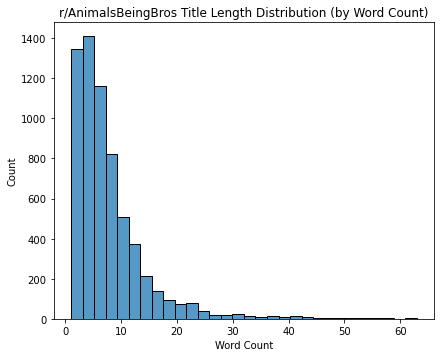

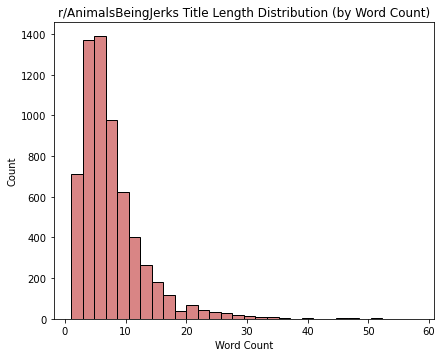

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(15,12), facecolor='white')

plt.subplot(2,2,1)
sns.histplot(data=bros,bins = 30, x="Word Count").set(title='r/AnimalsBeingBros Title Length Distribution (by Word Count)')
plt.show()

plt.figure(figsize=(15,12), facecolor='white')

plt.subplot(2,2,2)
sns.histplot(data=jerks, bins =30, x="Word Count", color='indianred').set(title='r/AnimalsBeingJerks Title Length Distribution (by Word Count)')
plt.show();

plt.tight_layout();

Overall, the two subreddits have a similar right-skewed distribution in word count.

# **2.2 EDA - Sentiment Intensity Analyzer**

**Creating and Applying Function**

In [30]:
def sentiment(row):
    analyzer = SentimentIntensityAnalyzer()
    res = analyzer.polarity_scores(row)
    return pd.Series([res['neg'], res['neu'], res['pos'], res['compound']])

df[['neg','neu','pos','comp']] = df['title'].apply(sentiment)

In [31]:
# Saving New DataFrame

df.to_csv('../data/full_df.csv')

In [32]:
# Filtering DataFrame by Subreddit

bro_df = df[df['subreddit']=='AnimalsBeingBros']
jerk_df = df[df['subreddit']=='AnimalsBeingJerks']

**Analyzing Texts from Each Subreddit**

In [33]:
print(f'Average Pos Scoring (r/AnimalsBeingBros): {bro_df["pos"].mean()}')
print(f'Average Pos Scoring (r/AnimalsBeingJerks): {jerk_df["pos"].mean()}')
print('---')
print(f'Average Neg Scoring (r/AnimalsBeingBros): {bro_df["neg"].mean()}')
print(f'Average Neg Scoring (r/AnimalsBeingJerks): {jerk_df["neg"].mean()}')
print('---')
print(f'Average Neu Scoring (r/AnimalsBeingBros): {bro_df["neu"].mean()}')
print(f'Average Neu Scoring (r/AnimalsBeingJerks): {jerk_df["neu"].mean()}')
print('---')
print(f'Average Comp Scoring (r/AnimalsBeingBros): {bro_df["comp"].mean()}')
print(f'Average Comp Scoring (r/AnimalsBeingJerks): {jerk_df["comp"].mean()}')
print('---')

Average Pos Scoring (r/AnimalsBeingBros): 0.1867295656235401
Average Pos Scoring (r/AnimalsBeingJerks): 0.10148609355246528
---
Average Neg Scoring (r/AnimalsBeingBros): 0.0456146660439047
Average Neg Scoring (r/AnimalsBeingJerks): 0.12627860303413407
---
Average Neu Scoring (r/AnimalsBeingBros): 0.7660990191499292
Average Neu Scoring (r/AnimalsBeingJerks): 0.7712850821744612
---
Average Comp Scoring (r/AnimalsBeingBros): 0.16871611396543731
Average Comp Scoring (r/AnimalsBeingJerks): -0.01456976927939324
---


## Bar Charts

In [34]:
bro_score = bro_df["pos"].mean(), bro_df["neg"].mean()
jerk_score = jerk_df["pos"].mean(), jerk_df["neg"].mean()

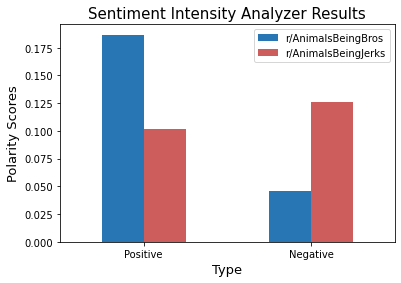

In [35]:
frame = {'r/AnimalsBeingBros': bro_score, 'r/AnimalsBeingJerks': jerk_score}
  
result = pd.DataFrame(frame)
bar_width = 0.35
opacity = 0.8  
result.plot.bar(color= ['#2877B4', 'indianred'])
plt.xticks([0, 1], ["Positive", "Negative"],  rotation = 0)
plt.xlabel('Type', fontsize = 13)
plt.ylabel('Polarity Scores', fontsize = 13)
plt.legend(loc = 'best')
plt.title('Sentiment Intensity Analyzer Results', fontsize = 15)
plt.show()

In [36]:
bro_score = bro_df["pos"].mean(), bro_df["neg"].mean(), bro_df["neu"].mean()
jerk_score = jerk_df["pos"].mean(), jerk_df["neg"].mean(), bro_df["neu"].mean()

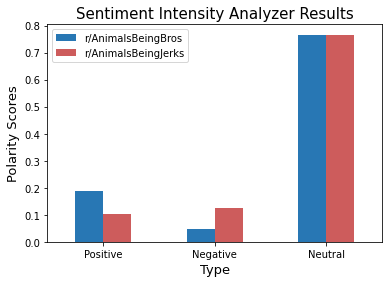

In [37]:
frame = {'r/AnimalsBeingBros': bro_score, 'r/AnimalsBeingJerks': jerk_score}
  
result = pd.DataFrame(frame)
bar_width = 0.35
opacity = 0.8  
result.plot.bar(color= ['#2877B4', 'indianred'])
plt.xticks([0, 1, 2], ["Positive", "Negative", "Neutral"],  rotation = 0)
plt.xlabel('Type', fontsize = 13)
plt.ylabel('Polarity Scores', fontsize = 13)
plt.legend(loc = 'best')
plt.title('Sentiment Intensity Analyzer Results', fontsize = 15)
plt.show()

# **2.3 EDA - Top 20 Words**

## Bar Charts

### *r/AnimalsBeingBros*

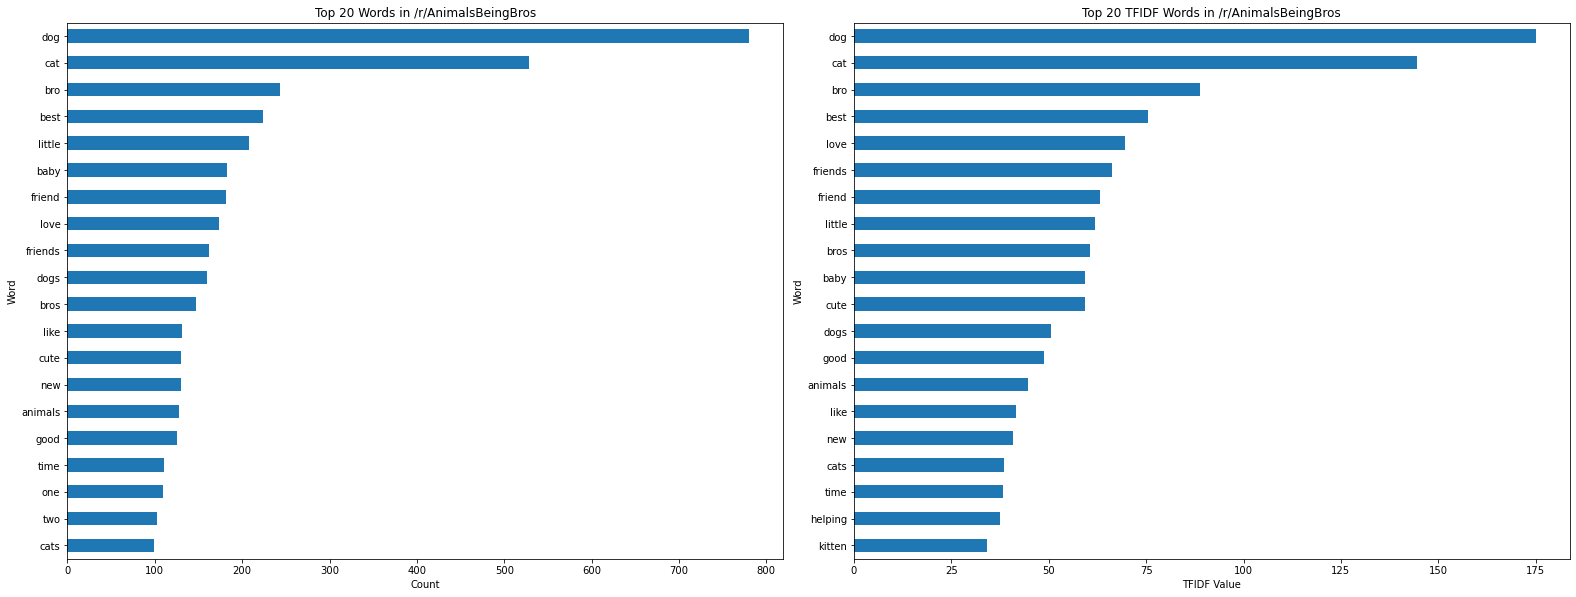

In [45]:
# Setting Stopwords
stops = (set(stopwords.words('english')))
cvec = CountVectorizer(stop_words=stops)
tfidf = TfidfVectorizer(stop_words=stops)

# Explore CountVectorizer token counts in /r/animalsbeingbros
words_cvec_bro = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingBros']['title']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_bro = words_cvec_bro.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingbros
words_tfidf_bro = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingBros']['title']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_bro = words_tfidf_bro.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in /r/AnimalsBeingBros')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingBros')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

While observing these bar charts, it is clear that we can reduce dimensionality if we lemmatize or stem our data. Stemming, however, may be more effective as words like 'helping' might be best treated as its root word, 'help'.

### *r/AnimalsBeingJerks*

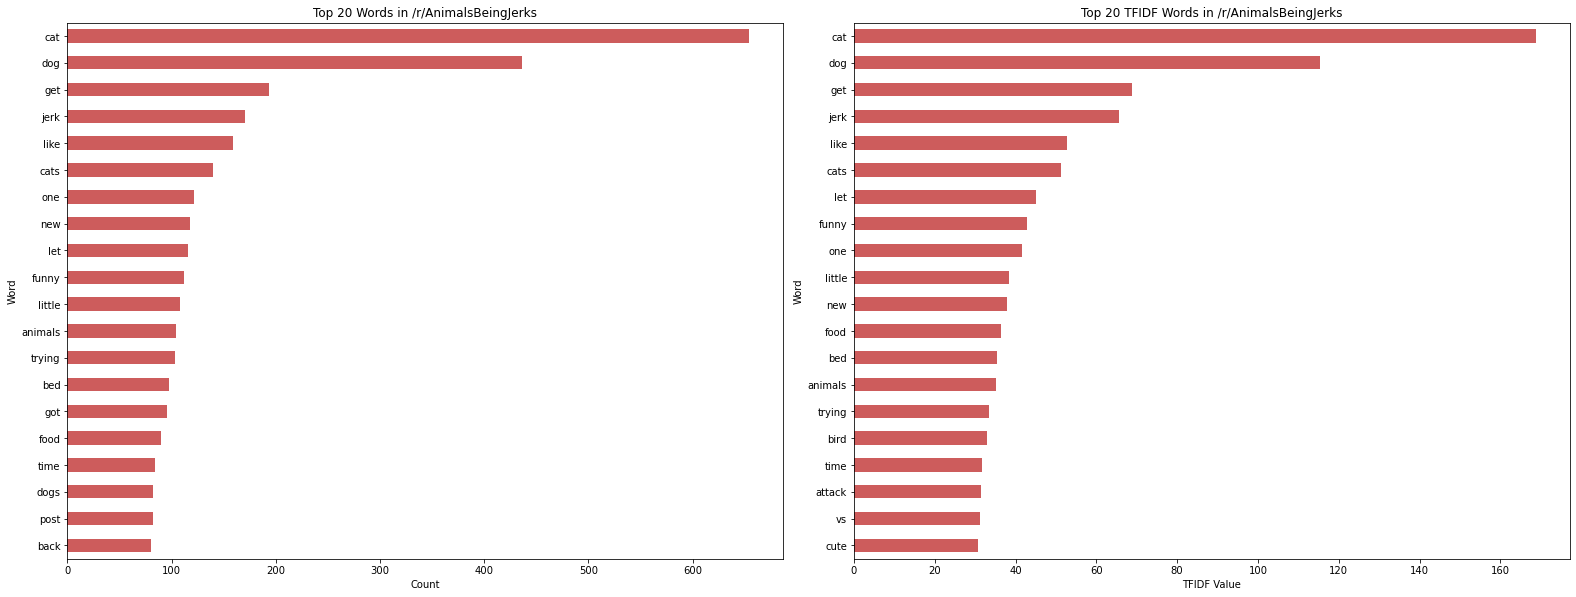

In [46]:
# Explore CountVectorizer token counts in /r/animalsbeingjerks
words_cvec_jerk = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['title']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_jerk = words_cvec_jerk.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingjerks
words_tfidf_jerk = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['title']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_jerk = words_tfidf_jerk.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_jerk.sort_values().tail(20).plot(kind='barh', color = 'indianred')
plt.title('Top 20 Words in /r/AnimalsBeingJerks')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_jerk.sort_values().tail(20).plot(kind='barh', color = 'indianred')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingJerks')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout();

While observing this bar charts, it is clear that we can reduce dimensionality if we stem or lemmatize our data. Words like 'cat' and 'cats' or 'jerk' and 'jerks' should not be treated as two separate words. Lemmatizing and stemming will help us solve this problem.

# **2.4 Pre-Processing - Lemmatizing & Stemming**

### Tokenize

In [47]:
df['tokenized'] = df['title'].apply(word_tokenize)
df.head()

,title,author,created_utc,subreddit,is_AnimalsBeingJerks,neg,neu,pos,comp,tokenized
0,"funny animals,",WarrenWhitney,1451616579,AnimalsBeingBros,0,0.0,0.256,0.744,0.4404,"[funny, animals, ,]"
1,dog takes baby for a stroll.,loopdeloops,1451583756,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[dog, takes, baby, for, a, stroll, .]"
2,"come here. closer, i love you!",iBleeedorange,1451582799,AnimalsBeingBros,0,0.0,0.471,0.529,0.6696,"[come, here, ., closer, ,, i, love, you, !]"
3,dog playing with a deer,N8theGr8,1451582269,AnimalsBeingBros,0,0.0,0.625,0.375,0.2023,"[dog, playing, with, a, deer]"
4,perks of being alpha.,[deleted],1451581886,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[perks, of, being, alpha, .]"


### Removing Contractions

In [48]:
df['no_contract'] = df['title'].apply(lambda x: [contractions.fix(word) for word in x.split()]) # Removes contractions
df['no_contract'] = [' '.join(map(str, l)) for l in df['no_contract']] # From list to a string
df['no_contract'] = df['no_contract'].apply(word_tokenize) # Tokenize, again
df.head()

,title,author,created_utc,subreddit,is_AnimalsBeingJerks,neg,neu,pos,comp,tokenized,no_contract
0,"funny animals,",WarrenWhitney,1451616579,AnimalsBeingBros,0,0.0,0.256,0.744,0.4404,"[funny, animals, ,]","[funny, animals, ,]"
1,dog takes baby for a stroll.,loopdeloops,1451583756,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[dog, takes, baby, for, a, stroll, .]","[dog, takes, baby, for, a, stroll, .]"
2,"come here. closer, i love you!",iBleeedorange,1451582799,AnimalsBeingBros,0,0.0,0.471,0.529,0.6696,"[come, here, ., closer, ,, i, love, you, !]","[come, here, ., closer, ,, i, love, you, !]"
3,dog playing with a deer,N8theGr8,1451582269,AnimalsBeingBros,0,0.0,0.625,0.375,0.2023,"[dog, playing, with, a, deer]","[dog, playing, with, a, deer]"
4,perks of being alpha.,[deleted],1451581886,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[perks, of, being, alpha, .]","[perks, of, being, alpha, .]"


### Removing Punctuation

In [49]:
punc = string.punctuation
df['no_punc'] = df['no_contract'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,title,author,created_utc,subreddit,is_AnimalsBeingJerks,neg,neu,pos,comp,tokenized,no_contract,no_punc
0,"funny animals,",WarrenWhitney,1451616579,AnimalsBeingBros,0,0.0,0.256,0.744,0.4404,"[funny, animals, ,]","[funny, animals, ,]","[funny, animals]"
1,dog takes baby for a stroll.,loopdeloops,1451583756,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[dog, takes, baby, for, a, stroll, .]","[dog, takes, baby, for, a, stroll, .]","[dog, takes, baby, for, a, stroll]"
2,"come here. closer, i love you!",iBleeedorange,1451582799,AnimalsBeingBros,0,0.0,0.471,0.529,0.6696,"[come, here, ., closer, ,, i, love, you, !]","[come, here, ., closer, ,, i, love, you, !]","[come, here, closer, i, love, you]"
3,dog playing with a deer,N8theGr8,1451582269,AnimalsBeingBros,0,0.0,0.625,0.375,0.2023,"[dog, playing, with, a, deer]","[dog, playing, with, a, deer]","[dog, playing, with, a, deer]"
4,perks of being alpha.,[deleted],1451581886,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[perks, of, being, alpha, .]","[perks, of, being, alpha, .]","[perks, of, being, alpha]"


### Creating Lemmatizing & Stemming Functions

Now that our text has been cleaned of contractions and punctuation and has been tokenized, it is ready to be lemmatized and stemmed.

In [50]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

df['lemmatized'] = df['no_punc'].apply(lemmatize_text) # Lemmatizes
df['lemmatized'] = df['lemmatized'].apply(lambda x: ' '.join([str(i) for i in x])) # Converts back to string

In [51]:
def stem_text(text):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in text]

df['stemmed'] = df['no_punc'].apply(stem_text) # Stems
df['stemmed'] = df['stemmed'].apply(lambda x: ' '.join([str(i) for i in x])) # Converts back to string


In [52]:
df.head()

,title,author,created_utc,subreddit,is_AnimalsBeingJerks,neg,neu,pos,comp,tokenized,no_contract,no_punc,lemmatized,stemmed
0,"funny animals,",WarrenWhitney,1451616579,AnimalsBeingBros,0,0.0,0.256,0.744,0.4404,"[funny, animals, ,]","[funny, animals, ,]","[funny, animals]",funny animal,funni anim
1,dog takes baby for a stroll.,loopdeloops,1451583756,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[dog, takes, baby, for, a, stroll, .]","[dog, takes, baby, for, a, stroll, .]","[dog, takes, baby, for, a, stroll]",dog take baby for a stroll,dog take babi for a stroll
2,"come here. closer, i love you!",iBleeedorange,1451582799,AnimalsBeingBros,0,0.0,0.471,0.529,0.6696,"[come, here, ., closer, ,, i, love, you, !]","[come, here, ., closer, ,, i, love, you, !]","[come, here, closer, i, love, you]",come here closer i love you,come here closer i love you
3,dog playing with a deer,N8theGr8,1451582269,AnimalsBeingBros,0,0.0,0.625,0.375,0.2023,"[dog, playing, with, a, deer]","[dog, playing, with, a, deer]","[dog, playing, with, a, deer]",dog playing with a deer,dog play with a deer
4,perks of being alpha.,[deleted],1451581886,AnimalsBeingBros,0,0.0,1.000,0.000,0.0000,"[perks, of, being, alpha, .]","[perks, of, being, alpha, .]","[perks, of, being, alpha]",perk of being alpha,perk of be alpha


In [53]:
# Manually changing bros to bro as lemmatizing did not do this.
df['lemmatized'] = df['lemmatized'].str.replace('bros','bro')

In [55]:
# Saving work
df.dropna(inplace=True)
df.to_csv('../data/full_df.csv', index=False)

# **2.5 EDA - Top 20 Words (After Lemmatizing and Stemming)**

## Bar Charts (after Lemmatizing)

### *r/animalsbeingbros*

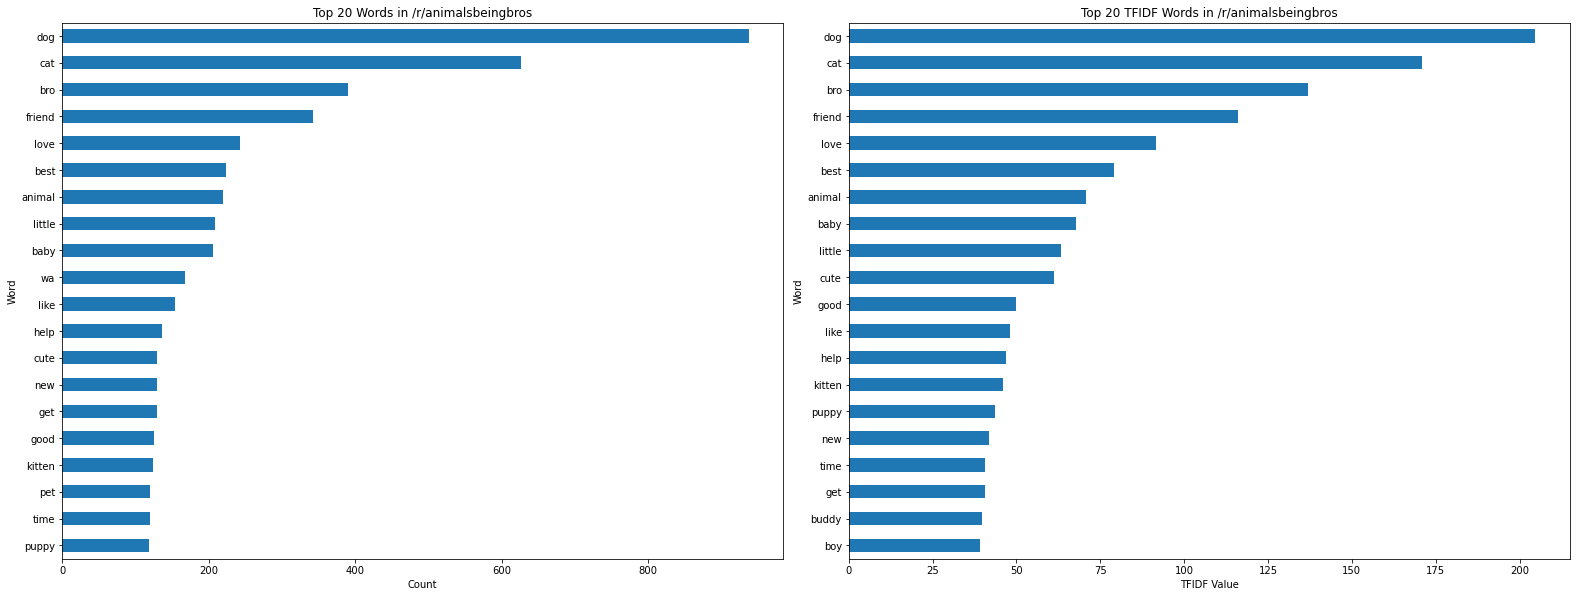

In [56]:
#Setting Stopwords
stops = (set(stopwords.words('english')))
cvec = CountVectorizer(stop_words=stops)
tfidf = TfidfVectorizer(stop_words=stops)

# Explore CountVectorizer token counts in /r/animalsbeingbros
words_cvec_bro = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingBros']['lemmatized']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_bro = words_cvec_bro.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingbros
words_tfidf_bro = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingBros']['lemmatized']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_bro = words_tfidf_bro.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in /r/animalsbeingbros')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in /r/animalsbeingbros')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

### *r/animalsbeingjerks*

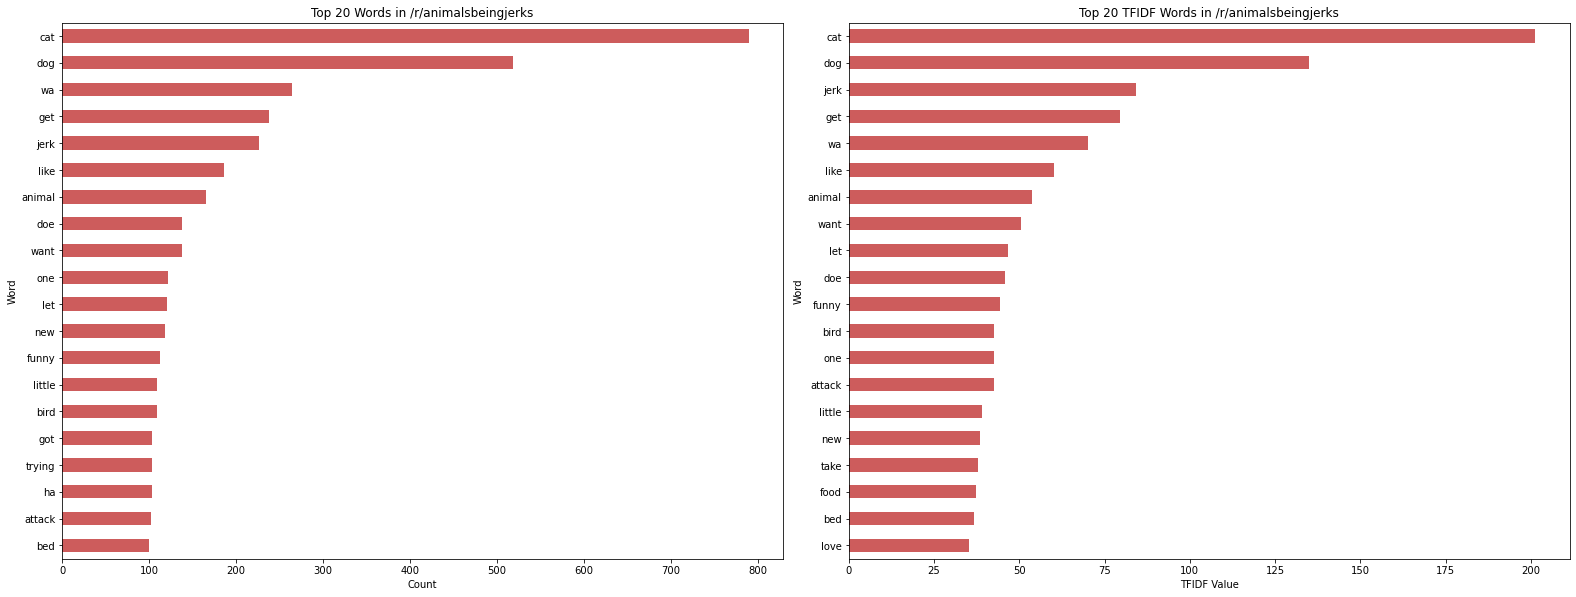

In [57]:
# Explore CountVectorizer token counts in /r/animalsbeingjerks
words_cvec_jerk = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['lemmatized']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_jerk = words_cvec_jerk.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingjerks
words_tfidf_jerk = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['lemmatized']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_jerk = words_tfidf_jerk.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 Words in /r/animalsbeingjerks')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 TFIDF Words in /r/animalsbeingjerks')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

## Bar Charts (after Stemming)

### *r/AnimalsBeingBros*

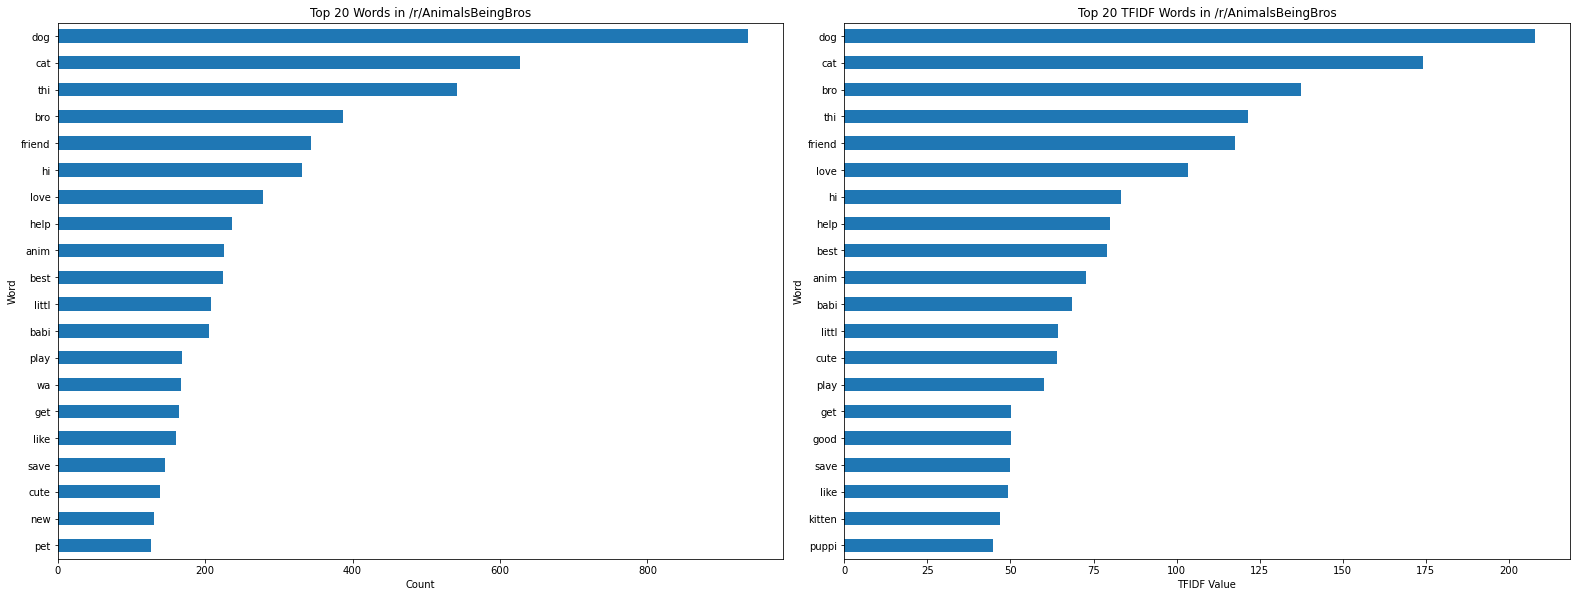

In [58]:
# Explore CountVectorizer token counts in /r/animalsbeingbros
words_cvec_bro = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingBros']['stemmed']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_bro = words_cvec_bro.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingbros
words_tfidf_bro = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingBros']['stemmed']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_bro = words_tfidf_bro.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16))

plt.subplot(2,2,1)
word_cvec_counts_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in /r/AnimalsBeingBros')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingBros')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

### *r/AnimalsBeingJerks*

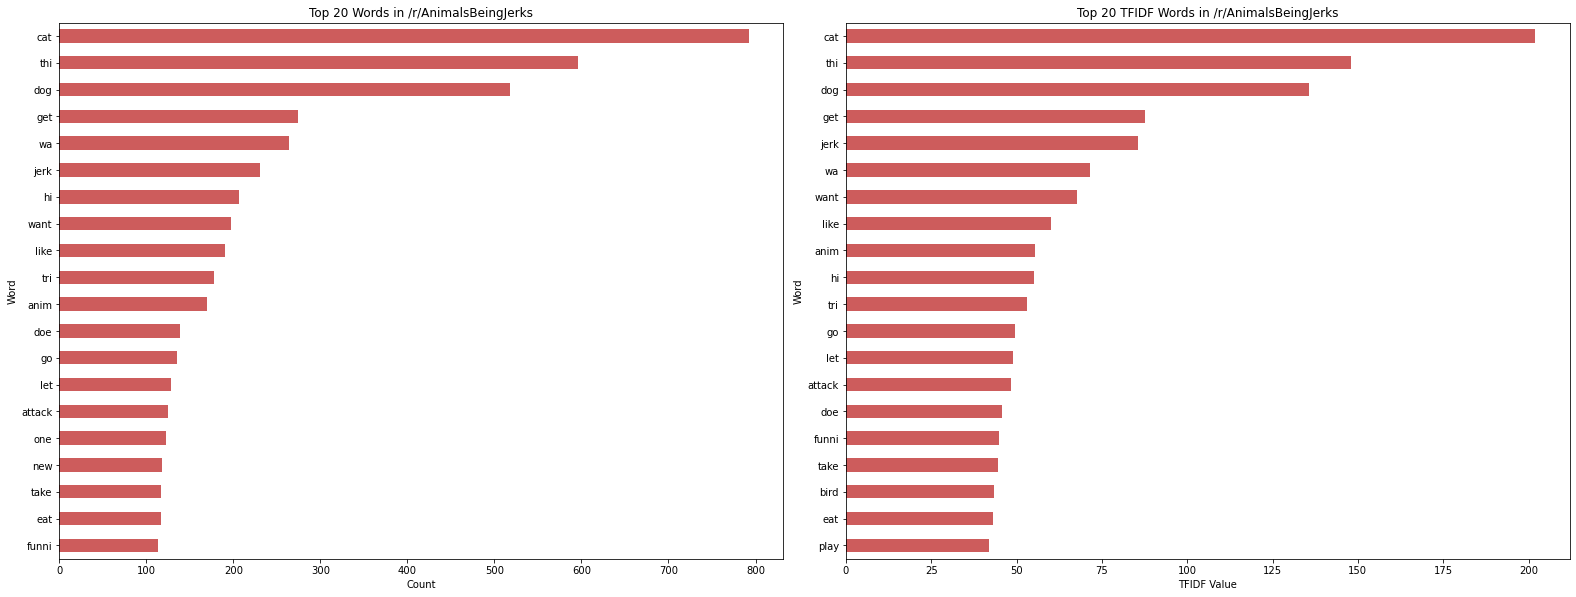

In [59]:
# Explore CountVectorizer token counts in /r/animalsbeingjerks
words_cvec_jerk = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['stemmed']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_jerk = words_cvec_jerk.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingjerks
words_tfidf_jerk = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['stemmed']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_jerk = words_tfidf_jerk.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 Words in /r/AnimalsBeingJerks')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingJerks')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

# **2.6 EDA - Top 20 Words (After Lemmatizing/Stemming & Custom Stop Words)**

## Adding More Stop Words 

In [60]:
import nltk
from nltk.corpus import stopwords

stops = (set(stopwords.words('english')))
stops.update(['time', 'little', 'like', 'get', 'new', 'let', 'wa', 'ha', 'got', 'thi', 'hi', 'tri', 'doe'])

cvec = CountVectorizer(stop_words=stops)
tfidf = TfidfVectorizer(stop_words=stops)

## Bar Charts (after Lemmatizing & Custom Stop Words)

### *r/AnimalsBeingBros*

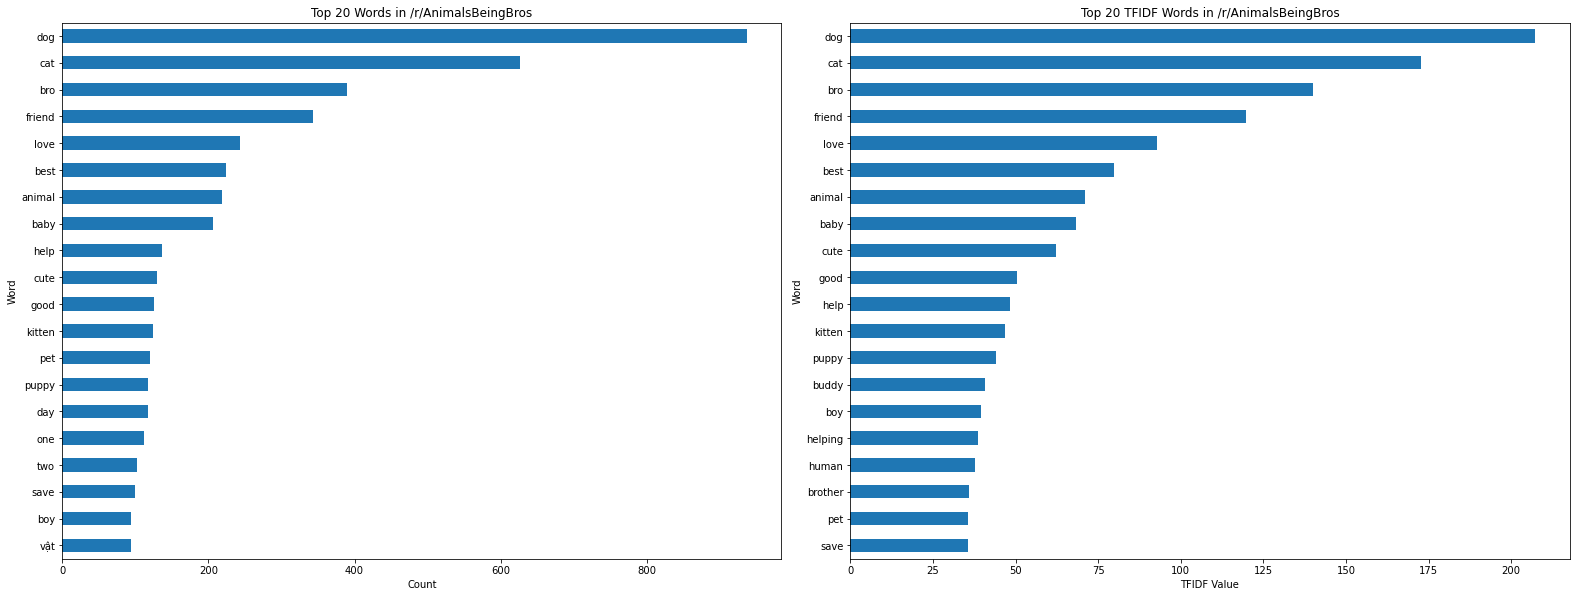

In [61]:
# Explore CountVectorizer token counts in /r/animalsbeingbros
words_cvec_bro = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingBros']['lemmatized']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_bro = words_cvec_bro.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingbros
words_tfidf_bro = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingBros']['lemmatized']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_bro = words_tfidf_bro.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in /r/AnimalsBeingBros')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingBros')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

### *r/AnimalsBeingJerks*

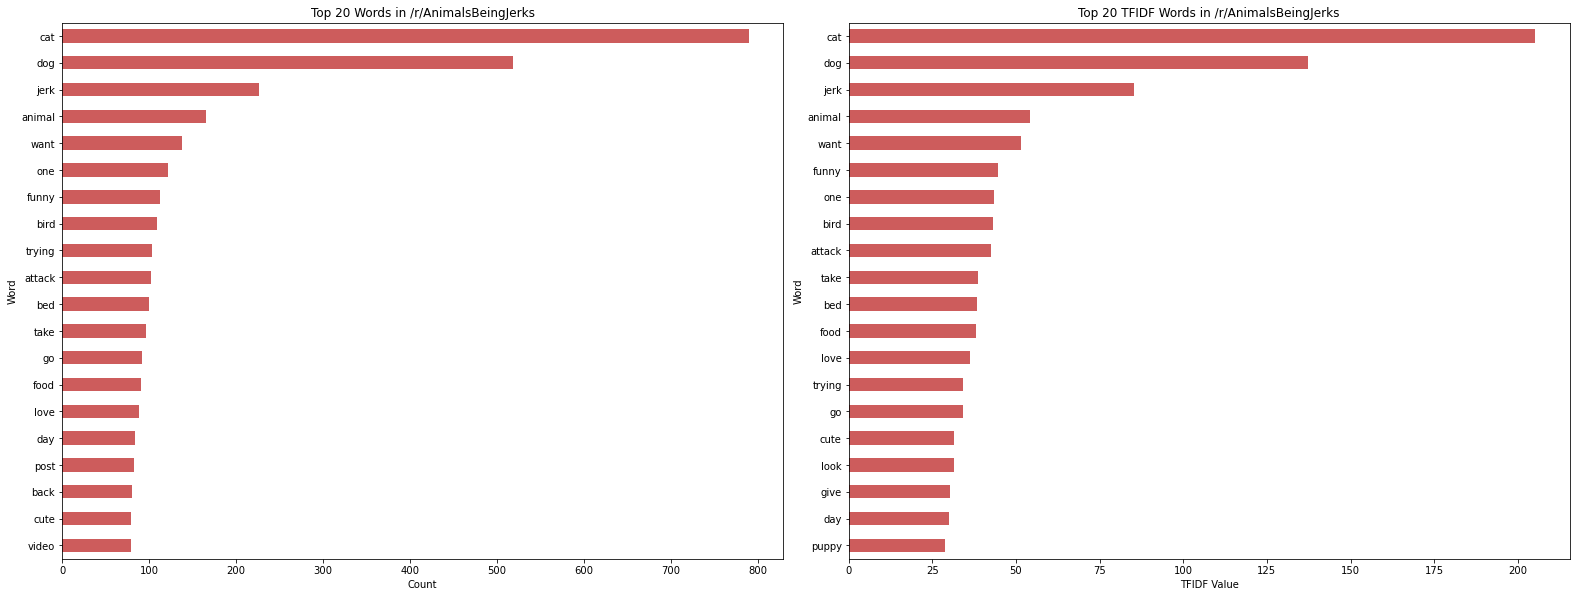

In [62]:
# Explore CountVectorizer token counts in /r/animalsbeingjerks
words_cvec_jerk = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['lemmatized']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_jerk = words_cvec_jerk.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingjerks
words_tfidf_jerk = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['lemmatized']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_jerk = words_tfidf_jerk.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 Words in /r/AnimalsBeingJerks')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingJerks')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

## Bar Charts (after Stemming & Custom Stop Words)

### *r/AnimalsBeingBros*

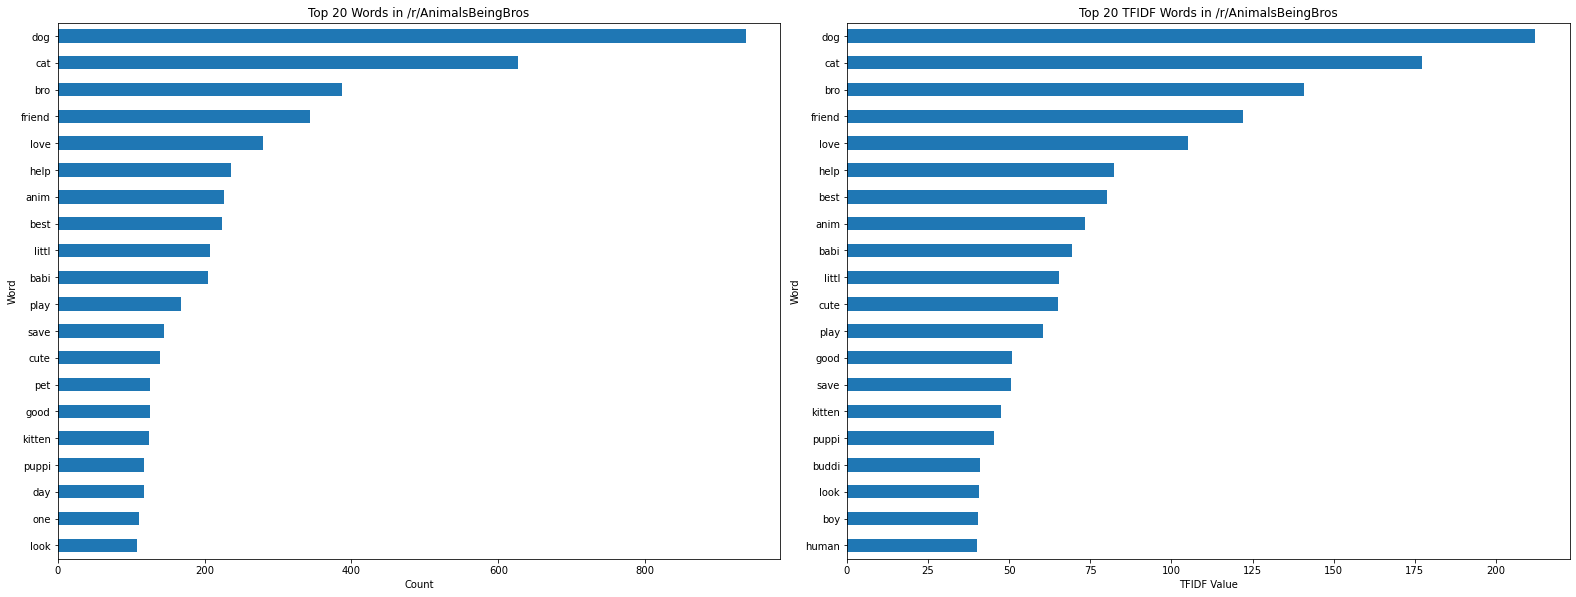

In [63]:
# Explore CountVectorizer token counts in /r/animalsbeingbros
words_cvec_bro = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingBros']['stemmed']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_bro = words_cvec_bro.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingbros
words_tfidf_bro = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingBros']['stemmed']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_bro = words_tfidf_bro.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16))

plt.subplot(2,2,1)
word_cvec_counts_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Words in /r/AnimalsBeingBros')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_bro.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingBros')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

### *r/AnimalsBeingJerks*

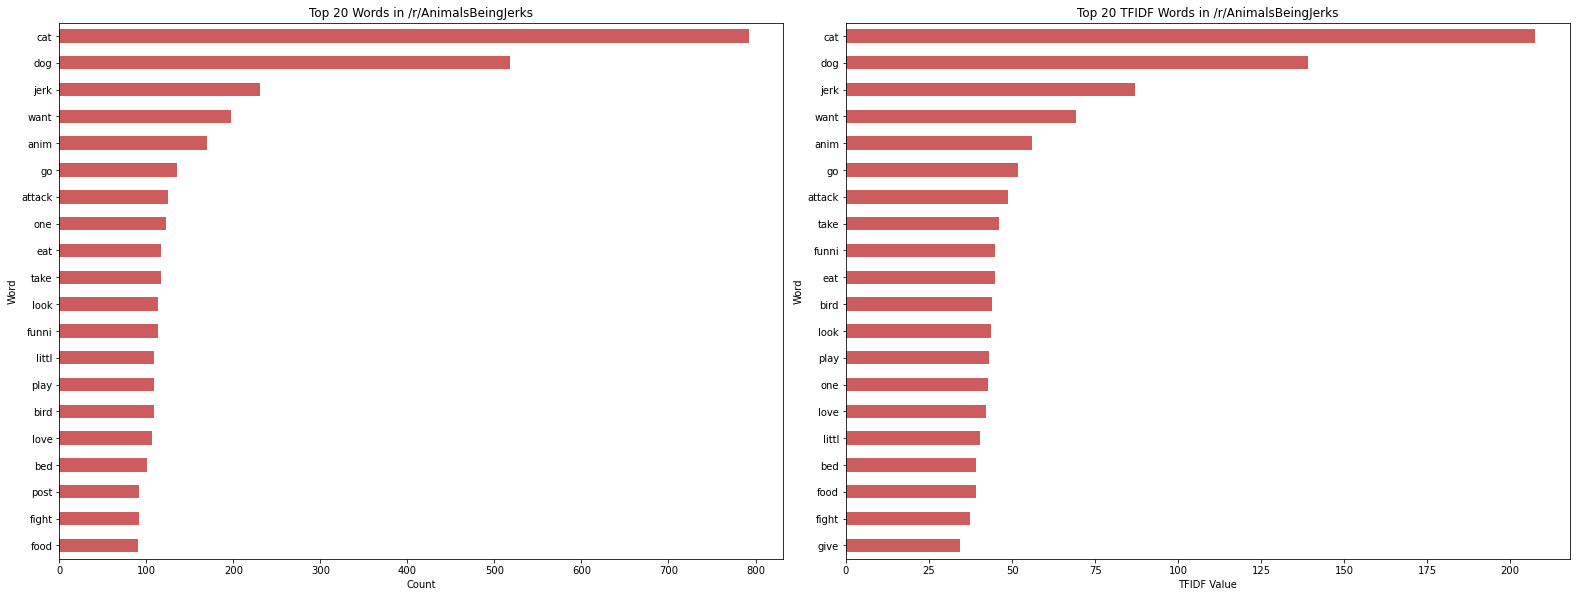

In [64]:
# Explore CountVectorizer token counts in /r/animalsbeingjerks
words_cvec_jerk = pd.DataFrame(cvec.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['stemmed']).todense(),
                       columns=cvec.get_feature_names())
word_cvec_counts_jerk = words_cvec_jerk.sum(axis=0)

# Explore TfidfVectorizer token counts in /r/animalsbeingjerks
words_tfidf_jerk = pd.DataFrame(tfidf.fit_transform(df[df.subreddit=='AnimalsBeingJerks']['stemmed']).todense(),
                       columns=tfidf.get_feature_names())
word_counts_tfidf_jerk = words_tfidf_jerk.sum(axis=0)

# Plot top 20 words
plt.figure(figsize=(22,16), facecolor='white')

plt.subplot(2,2,1)
word_cvec_counts_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 Words in /r/AnimalsBeingJerks')
plt.xlabel('Count')
plt.ylabel('Word')

plt.subplot(2,2,2)
word_counts_tfidf_jerk.sort_values().tail(20).plot(kind='barh', color='indianred')
plt.title('Top 20 TFIDF Words in /r/AnimalsBeingJerks')
plt.xlabel('TFIDF Value')
plt.ylabel('Word')

plt.tight_layout()

# ***Next Notebook***

## [03: Model Selction & Evaluation](https://github.com/ksylvia16/Subreddit-Classification/blob/5b156cc3101e94489a784c7e2d0ca7f442839bfe/code/03_Model%20Selection_%26_Evaluation.ipynb)